<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/knn_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k近傍法

変数命名のルール  
行列：M_で始まる  
ベクトル：v_で始まる  
スカラー等：その他

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## 訓練データ生成

In [21]:
def gen_data():
  # サイゴに - 1して平均値を0から-1に
    M_x_smaller = np.random.normal(size=50).reshape(-1, 2) - 1
    M_x_larger = np.random.normal(size=50).reshape(-1, 2) + 1.
    M_x_train = np.concatenate([M_x_smaller, M_x_larger])
    print("gen_data()内のM_x_train.shape :")
    print(M_x_train.shape)
    v_y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return M_x_train, v_y_train

gen_data()内のM_x_train.shape :
(50, 2)


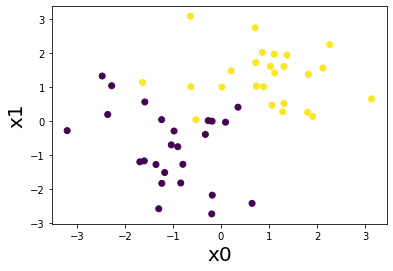

In [31]:
M_x_train, v_y_train = gen_data()
v_x0 = M_x_train[:, 0]
v_x1 = M_x_train[:, 1]
plt.xlabel("x0", fontsize=20)
plt.ylabel('x1', fontsize=20)
# plt.set_xlabel("説明変数x0", fontname="MS Gothic")
# plt.set_ylabel('説明変数x1', fontname="MS Gothic")
plt.scatter(v_x0, v_x1, c = v_y_train)

## 予測

近傍の既存データ$k$個の内の、最も多くが属する分類先に新規データを所属させる。

In [52]:
# 三平方の定理　ピタゴラスの定理
def distance(v_x1, M_x2):
    return np.sum((v_x1 - M_x2)**2, axis=1)

# knc : K Neighbors Classifier
def knc_predict(n_neighbors, M_x_train, v_y_train, M_x_test):
    v_y_pred = np.empty(len(M_x_test), dtype = v_y_train.dtype)
    for i, v_x in enumerate(M_x_test):
        distances = distance(v_x, M_x_train)
        if i==0:
          print("distances :")
          print(distances)
        nearest_index = distances.argsort()[:n_neighbors]
        if i==0:
          print("nearest_index :")
          print(nearest_index)
        # 最頻値 mode
        mode, _ = stats.mode(v_y_train[nearest_index])
        v_y_pred[i] = mode
    return v_y_pred

def plt_resut(M_x_train, v_y_train, v_y_pred):
    M_xx0, M_xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    M_xx = np.array([M_xx0, M_xx1]).reshape(2, -1).T
    plt.scatter(M_x_train[:, 0], M_x_train[:, 1], c=v_y_train)
    plt.contourf(M_xx0, M_xx1, v_y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

[[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
  [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
  [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
  ...
  [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
  [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
  [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]

 [[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
  [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
  [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
  ...
  [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
  [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
  [ 5.         5.         5.        ...  5.         5.         5.       ]]]
distances :
[ 26.75540578  24.18608     47.47973251  34.78117542  48.07535202
  57.84273095  26.

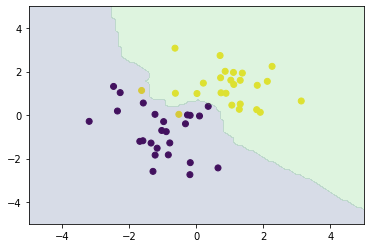

In [53]:
n_neighbors = 3

M_mesh0, M_mesh1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
# print(M_mesh0)
# print(M_mesh1)
print(np.array([M_mesh0, M_mesh1]))
M_x_test = np.array([M_mesh0, M_mesh1]).reshape(2, -1).T

v_y_pred = knc_predict(n_neighbors, M_x_train, v_y_train, M_x_test)
plt_resut(M_x_train, v_y_train, v_y_pred)

## sklearn実装

In [54]:
M_mesh0, M_mesh1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
M_xx = np.array([M_mesh0, M_mesh1]).reshape(2, -1).T

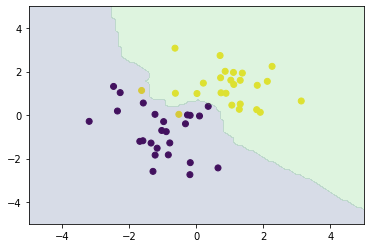

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = n_neighbors).fit(M_x_train, v_y_train)
plt_resut(M_x_train, v_y_train, knc.predict(M_xx))